In [3]:
import sys
sys.path.append('../utils')

In [4]:
from process import ImagePrec
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

##### Initializing a object instance

In [6]:
label_file = '../data/base/Annotations/label.csv'
img_path = '../data/base'
category = "collar_design_labels"
ip = ImagePrec(category=category, label_file=label_file, img_path=img_path, 
               pad_square=True, size=128)

Time usage for loading the images is 168.489672899 sec.


##### Random show images

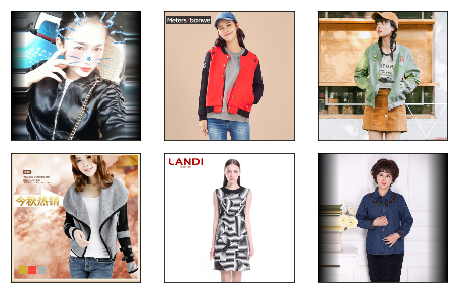

In [7]:
n = len(ip._imgs)
idx = np.array([np.random.randint(n) for i in range(6)])
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
for i, ax in zip(idx, axes.flat):
    ax.imshow(ip._imgs[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
idx = np.array([np.random.randint(n)])
batch = ip.getbatch(idx=idx, reflect=True, random_crop=4, crop_resize=True)

##### Check the Batch generator

In [ ]:
x, y = batch
print np.array(x).shape, np.array(y).shape

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (8, 5))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
for i, ax in enumerate(axes.flat):
    ax.imshow(x[i])
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
# Keras
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, Reshape
from keras.optimizers import SGD, Adam, RMSprop, Adadelta
from keras.utils import np_utils, plot_model
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.callbacks import LearningRateScheduler
from keras import regularizers
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50

##### Trying resnet 50

In [ ]:
model_resnet = ResNet50(weights='imagenet', include_top=False)
model_resnet.summary()

##### Trying non resized input images

In [ ]:
inlayer = Input(shape=(128, 128, 3), name = 'image_input')
output_resnet = model_resnet(inlayer)
pool = GlobalMaxPooling2D() (output_resnet)
main = Dropout(0.5) (Dense(1024, activation='relu')(pool))
main = Dropout(0.5) (Dense(128, activation='relu')(main))
output = Dense(len(y[0]), activation='softmax') (main)
model = Model(inputs=[inlayer], outputs=output)
model.summary()